<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

How to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Objectives


- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

In [2]:
!nvidia-smi

Sun Oct 24 13:40:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [3]:
# import tensorflow as tf
#print(tf.version.VERSION)

In [4]:
# !pip uninstall tensorflow

In [5]:
!pip install -q tensorflow==2.3.0
import tensorflow as tf
print(tf.version.VERSION)

     |████████████████████████████████| 320.4 MB 47 kB/s 
     |████████████████████████████████| 459 kB 40.2 MB/s 
     |████████████████████████████████| 2.9 MB 25.5 MB/s 
     |████████████████████████████████| 20.1 MB 38.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
2.3.0


In [6]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [7]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 7.7 MB 6.7 MB/s 
     |████████████████████████████████| 202 kB 38.7 MB/s 
     |████████████████████████████████| 15.7 MB 61 kB/s 
     |████████████████████████████████| 11.3 MB 43.9 MB/s 
     |████████████████████████████████| 296 kB 36.3 MB/s 
     |████████████████████████████████| 99 kB 8.1 MB/s 
     |████████████████████████████████| 28.5 MB 54 kB/s 
     |████████████████████████████████| 213 kB 41.2 MB/s 
     |████████████████████████████████| 4.0 MB 27.8 MB/s 
     |████████████████████████████████| 1.1 MB 38.6 MB/s 
     |████████████████████████████████| 352 kB 38.1 MB/s 
     |████████████████████████████████| 1.2 MB 33.4 MB/s 
     |████████████████████████████████| 10.3 MB 38.0 MB/s 
     |████████████████████████████████| 47.6 MB 33 kB/s 
     |████████████████████████████████| 596 kB 40.3 MB/s 
     |████████████████████████████████| 3.1 MB 42.4 MB/s 
     |████████████████████████████████| 44 kB 2.1 MB/s 
     |██████████████

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.4.0 and strictly below 2.7.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [3]:
#!pip install sklearn

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip", compression = 'zip', low_memory = False)
df.shape

(1306122, 3)

In [5]:
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

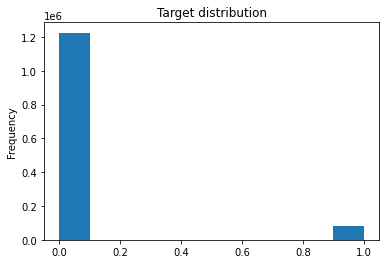

In [6]:
df.target.plot(kind = 'hist', title = "Target distribution")

* *We observe that we have a class imbalance issue.*
* *Before normalizing the data we will split it into test and validation to avoid the data leakage problem.*



## Task 4: Create tf.data.Datasets for Training and Evaluation

In [7]:
train_df, valid_test_df = train_test_split(df, random_state = 42, train_size = 0.0075, stratify = df.target.values)
valid_df, test_df = train_test_split(valid_test_df, random_state = 42, train_size = 0.00075, stratify = valid_test_df.target.values)
train_df.shape, valid_df.shape, test_df.shape

((9795, 3), (972, 3), (1295355, 3))

* *We observed that BERT got criticism because of the delays in training the model, but beaware the BERT has around 1.3 million parameters tuned and it will take considerable time as well.*
* *To deal with this problem, we will use Tensorflow Input Pipelines with tf.data API*
* *We will perform parallel processing to divide & speed up the tasks.*
* *So, when we pass a database into this, we obtain a python iterable object that can be convieniently fed into the machines.*


In [8]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, valid_df.target.values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

* *Generally while fine tuning in computer vision models, we freeze some of the part and fine-tune rest of the parameters, but here we need to perform the fine-tuning on all parameters.*
* *BERT contains 12 hidden layers/transformer blocks with hidden size of 768. It returns contextualised embeddings in 768 dimensions with 12 attention heads.*

In [9]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0,1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case)



In [10]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

* *the '##' represents that the word was attached to the previous word. So, here the symbol comma is attached to the word hi.*

In [11]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

* *Here, we get the numerical id wrt to each tokenencountered in the sentence.*
* *Each sentence has two special tokens -CLS token at the starts & SEP token at the end of each sequence that seperates it with other sentences.*

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

* *Token Ids- these are the ones that we saw above.*
* *Input mask- this is the maximum length for the input that we set to 128. So each sequence is padded upto the max_length to get the constant length vectors. So, when we take the dot product of tokenId and InputMask it gives zero.*
* *Input type Ids- BERT was pretrained on two tasks - one was mask lagugage modelling- and the other was- next sentence prediction. Type ID are all zeros for our case.*


We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [12]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                             text_a = text.numpy(),
                                             text_b = None,
                                             label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0,example,label_list, max_seq_length, tokenizer)
  return(feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [13]:
#function to convert the raw text into a format that BERT requires. 
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids': segment_ids
  }

  return (x,label_id)
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

* *Our function returns two tensors, one containing the text and other one with label (to_feature_map)*
* *Since we already have the train and valid dataset, we will transform it into "BERT" requirement type.*

In [14]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE)) #prefecth retrivies the data that needs to be executed before they are called
  #thus saving time 

  # valid
  valid_data = (valid_data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE)) 
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [15]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [16]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

For more details about Bert structure fly here- [Tensorflow BERT Hub](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3)

* The pooled_output is contextulized representation of entire input sequence.

In [17]:
# Building the model
def create_model():
    input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name = "input_word_ids")
    input_mask=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name = "input_mask")
    input_type_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name ="input_type_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

    drop = tf.keras.layers.Dropout(0.4)(pooled_output)
    output = tf.keras.layers.Dense(1,activation = 'sigmoid', name = "output")(drop) #sigmoid returns values between 0 and 1, for binary classification.

    model = tf.keras.Model(
        inputs = {
            'input_word_ids': input_word_ids,
            'input_mask': input_mask,
            'input_type_ids': input_type_ids
        },
        outputs = output)
    return model

## Task 10: Fine-Tune BERT for Text Classification

In [18]:
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

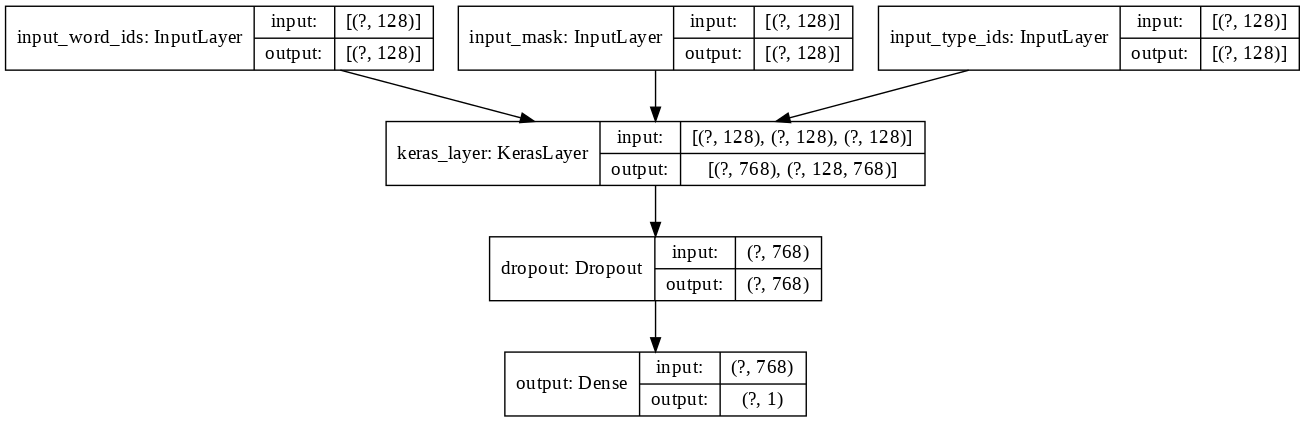

In [19]:

tf.keras.utils.plot_model(model = model, show_shapes=True, dpi = 100)

In [20]:
# Train model
epochs = 3
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/3
306/306 [==============================] - ETA: 0s - loss: 0.1685 - binary_accuracy: 0.9408WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0285s vs `on_test_batch_end` time: 0.4782s). Check your callbacks.


306/306 [==============================] - 467s 2s/step - loss: 0.1685 - binary_accuracy: 0.9408 - val_loss: 0.1203 - val_binary_accuracy: 0.9521
Epoch 2/3
306/306 [==============================] - 466s 2s/step - loss: 0.0920 - binary_accuracy: 0.9650 - val_loss: 0.1409 - val_binary_accuracy: 0.9510
Epoch 3/3
306/306 [==============================] - 466s 2s/step - loss: 0.0432 - binary_accuracy: 0.9840 - val_loss: 0.1813 - val_binary_accuracy: 0.9573


In [40]:
# import os
# path = '/content/drive/MyDrive/'
# model.save('BERT'+'.h5')
# os._exit():

## Task 11: Evaluate the BERT Text Classification Model

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

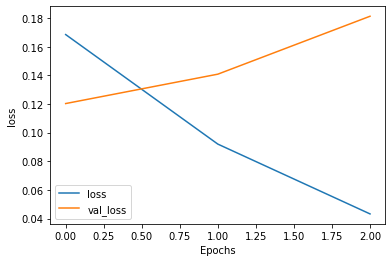

In [24]:
plot_graphs(history, 'loss')

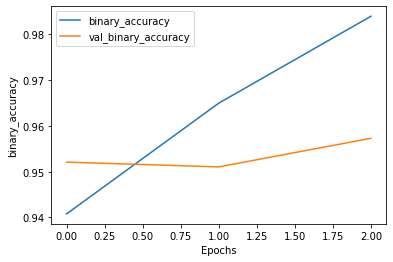

In [25]:
plot_graphs(history, 'binary_accuracy')

In [32]:
sample_example = ["kill you", "good boy", "get out", "his grandmother was good"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.6 #between 0 and 1
['Inscencere' if pred>=threshold else 'sincere' for pred in preds]

['Inscencere', 'sincere', 'sincere', 'sincere']

* BERT is basically a trained Transformer Encoder stack and stands for Bidirectional Encoder Representations from Transformers. 
* BERT was pre-trained using a combination of masked language modeling objective and next sentence prediction on a large corpus comprising the Toronto Book Corpus and Wikipedia.
* BERT takes an input of a sequence of no more than 512 tokens and out- puts the representation of the sequence. 
* Image of BERT tokenization process:
![Image](https://jalammar.github.io/images/distilBERT/bert-distilbert-tokenization-2-token-ids.png)


